In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
df_copy = pd.read_excel('/content/drive/MyDrive/use_data.xlsx')
df_copy.head()

,back_hospital.yyyymmdd,back_hospital.area,back_hospital.sex,back_hospital.frequency,SO2,CO,O3,NO2,PM10,간호사,...,흡연율,병실수,보건시설,공장수,최저기온,최고기온,일평균기온,일평균습도,강수량,적설
0,2012-01-01,강원,1,3,0.010033,1.012879,0.019098,0.020873,81.560300,3983,...,26.2,20959,245,2877,-13.9,6.0,-7.4000,70.000,2.857143,0.0
1,2012-01-01,강원,2,3,0.010033,1.012879,0.019098,0.020873,81.560300,3983,...,26.2,20959,245,2877,-13.9,6.0,-7.4000,70.000,2.857143,0.0
2,2012-01-01,경기,1,4,0.009092,0.962206,0.012449,0.030763,85.343681,20380,...,24.5,123168,334,54213,-12.2,1.1,-6.2875,67.625,0.000000,0.0
3,2012-01-01,경기,2,5,0.009092,0.962206,0.012449,0.030763,85.343681,20380,...,24.5,123168,334,54213,-12.2,1.1,-6.2875,67.625,0.000000,0.0
4,2012-01-01,경남,1,2,0.008975,0.653175,0.021261,0.017499,62.009501,7548,...,24.1,56963,410,15305,-8.9,8.0,1.6500,55.625,0.000000,0.0


In [ ]:
df = df_copy.copy()
df.columns

Index(['back_hospital.yyyymmdd', 'back_hospital.area', 'back_hospital.sex',
       'back_hospital.frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10', '간호사',
       '고령인구비율(A÷B×100)', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과', '약국',
       '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수', '최저기온',
       '최고기온', '일평균기온', '일평균습도', '강수량', '적설'],
      dtype='object')

In [ ]:
df.columns = ['date', 'area', 'sex',
       'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10', '간호사',
       '고령인구비율', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과', '약국',
       '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수', '최저기온',
       '최고기온', '일평균기온', '일평균습도', '강수량', '적설']

In [ ]:
df.columns

Index(['date', 'area', 'sex', 'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       '간호사', '고령인구비율', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과', '약국',
       '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수', '최저기온',
       '최고기온', '일평균기온', '일평균습도', '강수량', '적설'],
      dtype='object')

In [ ]:
def cor_show(df):
  plt.figure(figsize=(30,15))
  cor = df.corr()
  sns.heatmap(cor, annot=True)
  plt.show()

def cor(df):
  cor = df.corr()
  cor_target = abs(cor['frequency'])
  return cor_target.sort_values(ascending=False)

In [ ]:
# 연도, 월, 일 변수 추가
df['year'], df['month'], df['day'] = (df['date'].dt.year, df['date'].dt.month, df['date'].dt.day)

In [ ]:
# 요일 변수 추가 월~일 : 0~6
df['dayofweek'] = df['date'].dt.dayofweek

In [ ]:
# 계절 변수 추가
spring_id = (3<= df['month']) & (df['month']<= 5)
summer_id = (6<= df['month']) & (df['month']<= 8)
fall_id = (9<= df['month']) & (df['month']<= 11)
winter_id = (12 == df['month']) | (1<= df['month']) & (df['month']<= 2)
df.loc[spring_id, 'season'] = 1 # 봄
df.loc[summer_id, 'season'] = 2 # 여름
df.loc[fall_id, 'season'] = 3 # 가을
df.loc[winter_id, 'season'] = 4 # 겨울

In [ ]:
# 주말 변수 추가
weekend_id = (df['dayofweek'] == 5) | (df['dayofweek'] == 6)
df['weekend'] = 0
df.loc[weekend_id, 'weekend'] = 1

In [ ]:
# 일교차 열 추가
df['일교차'] = df['최고기온'] - df['최저기온']
df['일교차']

0        19.9
1        19.9
2        13.3
3        13.3
4        16.9
         ... 
49669     9.0
49670    15.0
49671    15.0
49672    14.7
49673    14.7
Name: 일교차, Length: 49674, dtype: float64

In [ ]:
df.head()

,date,area,sex,frequency,SO2,CO,O3,NO2,PM10,간호사,...,일평균습도,강수량,적설,year,month,day,dayofweek,season,weekend,일교차
0,2012-01-01,강원,1,3,0.010033,1.012879,0.019098,0.020873,81.560300,3983,...,70.000,2.857143,0.0,2012,1,1,6,4.0,1,19.9
1,2012-01-01,강원,2,3,0.010033,1.012879,0.019098,0.020873,81.560300,3983,...,70.000,2.857143,0.0,2012,1,1,6,4.0,1,19.9
2,2012-01-01,경기,1,4,0.009092,0.962206,0.012449,0.030763,85.343681,20380,...,67.625,0.000000,0.0,2012,1,1,6,4.0,1,13.3
3,2012-01-01,경기,2,5,0.009092,0.962206,0.012449,0.030763,85.343681,20380,...,67.625,0.000000,0.0,2012,1,1,6,4.0,1,13.3
4,2012-01-01,경남,1,2,0.008975,0.653175,0.021261,0.017499,62.009501,7548,...,55.625,0.000000,0.0,2012,1,1,6,4.0,1,16.9


In [ ]:
df_spring = df[df['season'] == 1]
df_summer = df[df['season'] == 2]
df_fall = df[df['season'] == 3]
df_winter = df[df['season'] == 4]

In [ ]:
df.columns

Index(['date', 'area', 'sex', 'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       '간호사', '고령인구비율', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과', '약국',
       '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수', '최저기온',
       '최고기온', '일평균기온', '일평균습도', '강수량', '적설', 'year', 'month', 'day',
       'dayofweek', 'season', 'weekend', '일교차'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49674 entries, 0 to 49673
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       49674 non-null  datetime64[ns]
 1   area       49674 non-null  object        
 2   sex        49674 non-null  int64         
 3   frequency  49674 non-null  int64         
 4   SO2        49674 non-null  float64       
 5   CO         49674 non-null  float64       
 6   O3         49674 non-null  float64       
 7   NO2        49674 non-null  float64       
 8   PM10       49674 non-null  float64       
 9   간호사        49674 non-null  int64         
 10  고령인구비율     49674 non-null  float64       
 11  구급인력       49674 non-null  int64         
 12  구급차        49674 non-null  int64         
 13  병원         49674 non-null  int64         
 14  비만율        49674 non-null  float64       
 15  상급종합병원     49674 non-null  int64         
 16  신경외과       49674 non-null  int64        

In [ ]:
df_enc = pd.get_dummies(df, columns = ['sex', 'area', 'month', 'day', 'dayofweek', 'season', 'weekend'])
df_enc

,date,frequency,SO2,CO,O3,NO2,PM10,간호사,고령인구비율,구급인력,...,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,season_1.0,season_2.0,season_3.0,season_4.0,weekend_0,weekend_1
0,2012-01-01,3,0.010033,1.012879,0.019098,0.020873,81.560300,3983,15.7,566,...,0,0,0,1,0,0,0,1,0,1
1,2012-01-01,3,0.010033,1.012879,0.019098,0.020873,81.560300,3983,15.7,566,...,0,0,0,1,0,0,0,1,0,1
2,2012-01-01,4,0.009092,0.962206,0.012449,0.030763,85.343681,20380,9.4,1421,...,0,0,0,1,0,0,0,1,0,1
3,2012-01-01,5,0.009092,0.962206,0.012449,0.030763,85.343681,20380,9.4,1421,...,0,0,0,1,0,0,0,1,0,1
4,2012-01-01,2,0.008975,0.653175,0.021261,0.017499,62.009501,7548,12.5,731,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49669,2015-12-31,0,0.002903,0.539426,0.034771,0.009910,74.854167,2231,13.8,208,...,1,0,0,0,0,0,0,1,1,0
49670,2015-12-31,0,0.004571,0.786250,0.017996,0.019843,53.587500,4424,16.4,639,...,1,0,0,0,0,0,0,1,1,0
49671,2015-12-31,0,0.004571,0.786250,0.017996,0.019843,53.587500,4424,16.4,639,...,1,0,0,0,0,0,0,1,1,0
49672,2015-12-31,1,0.005597,0.849564,0.009818,0.028704,63.086927,3726,14.8,443,...,1,0,0,0,0,0,0,1,1,0


In [ ]:
col_idx = (df_enc.columns != 'frequency') & (df_enc.columns != 'date')

In [ ]:
df_enc.columns

Index(['date', 'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10', '간호사', '고령인구비율',
       '구급인력',
       ...
       'dayofweek_3', 'dayofweek_4', 'dayofweek_5', 'dayofweek_6',
       'season_1.0', 'season_2.0', 'season_3.0', 'season_4.0', 'weekend_0',
       'weekend_1'],
      dtype='object', length=107)

In [ ]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49674 entries, 0 to 49673
Columns: 107 entries, date to weekend_1
dtypes: datetime64[ns](1), float64(15), int64(16), uint8(75)
memory usage: 15.7 MB


In [ ]:
print(df_enc.count())

date          49674
frequency     49674
SO2           49674
CO            49674
O3            49674
              ...  
season_2.0    49674
season_3.0    49674
season_4.0    49674
weekend_0     49674
weekend_1     49674
Length: 107, dtype: int64


In [ ]:
print(df_enc.dtypes)

date          datetime64[ns]
frequency              int64
SO2                  float64
CO                   float64
O3                   float64
                   ...      
season_2.0             uint8
season_3.0             uint8
season_4.0             uint8
weekend_0              uint8
weekend_1              uint8
Length: 107, dtype: object


In [ ]:
import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import LSTM

In [ ]:
scaler = MinMaxScaler()
scale_cols = ['sex', 'frequency', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       '간호사', '고령인구비율', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과', '약국',
       '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수', '최저기온',
       '최고기온', '일평균기온', '일평균습도', '강수량', '적설', 'year', 'month', 'day',
       'dayofweek', 'season', 'weekend', '일교차']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

       sex  frequency       SO2        CO        O3       NO2      PM10  \
0      0.0   0.230769  0.391438  0.474023  0.216871  0.240383  0.140204   
1      1.0   0.230769  0.391438  0.474023  0.216871  0.240383  0.140204   
2      0.0   0.307692  0.351492  0.446559  0.135393  0.366070  0.147065   
3      1.0   0.384615  0.351492  0.446559  0.135393  0.366070  0.147065   
4      0.0   0.153846  0.346530  0.279067  0.243373  0.197505  0.104750   
...    ...        ...       ...       ...       ...       ...       ...   
49669  1.0   0.000000  0.088788  0.217416  0.408915  0.101069  0.128043   
49670  0.0   0.000000  0.159580  0.351192  0.203360  0.227291  0.089478   
49671  1.0   0.000000  0.159580  0.351192  0.203360  0.227291  0.089478   
49672  0.0   0.076923  0.203137  0.385508  0.103151  0.339901  0.106704   
49673  1.0   0.000000  0.203137  0.385508  0.103151  0.339901  0.106704   

            간호사    고령인구비율      구급인력  ...     일평균습도       강수량   적설  year  \
0      0.098433  0.63076

In [ ]:
train = df_scaled[:-200]
test = df_scaled[-200:]

In [ ]:
def make_dataset(data, label, window_size=20):
  feature_list = []
  label_list = []
  for i in range(len(data) - window_size):
    feature_list.append(np.array(data.iloc[i:i+window_size]))
    label_list.append(np.array(label.iloc[i+window_size]))
  return np.array(feature_list), np.array(label_list)

In [ ]:
feature_cols = ['sex', 'SO2', 'CO', 'O3', 'NO2', 'PM10',
       '간호사', '고령인구비율', '구급인력', '구급차', '병원', '비만율', '상급종합병원', '신경외과', '약국',
       '요양병원', '응급의학과', '종합병원', '흉부외과', '흡연율', '병실수', '보건시설', '공장수', '최저기온',
       '최고기온', '일평균기온', '일평균습도', '강수량', '적설', 'year', 'month', 'day',
       'dayofweek', 'season', 'weekend', '일교차']
label_cols = ['frequency']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

((39563, 20, 36), (9891, 20, 36))

In [ ]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 36), (180, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
          )
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = 'tmp_checkpoint.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=16,
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stop, checkpoint])

Epoch 1/200
2467/2473 [============================>.] - ETA: 0s - loss: 0.0124
Epoch 1: val_loss improved from inf to 0.01067, saving model to tmp_checkpoint.h5
2473/2473 [==============================] - 26s 9ms/step - loss: 0.0124 - val_loss: 0.0107
Epoch 2/200
2469/2473 [============================>.] - ETA: 0s - loss: 0.0100
Epoch 2: val_loss improved from 0.01067 to 0.00963, saving model to tmp_checkpoint.h5
2473/2473 [==============================] - 23s 9ms/step - loss: 0.0100 - val_loss: 0.0096
Epoch 3/200
2473/2473 [==============================] - ETA: 0s - loss: 0.0096
Epoch 3: val_loss did not improve from 0.00963
2473/2473 [==============================] - 23s 9ms/step - loss: 0.0096 - val_loss: 0.0096
Epoch 4/200
2472/2473 [============================>.] - ETA: 0s - loss: 0.0093
Epoch 4: val_loss improved from 0.00963 to 0.00933, saving model to tmp_checkpoint.h5
2473/2473 [==============================] - 24s 10ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 5/20

In [ ]:
model.load_weights(filename)

In [ ]:
pred = model.predict(test_feature)

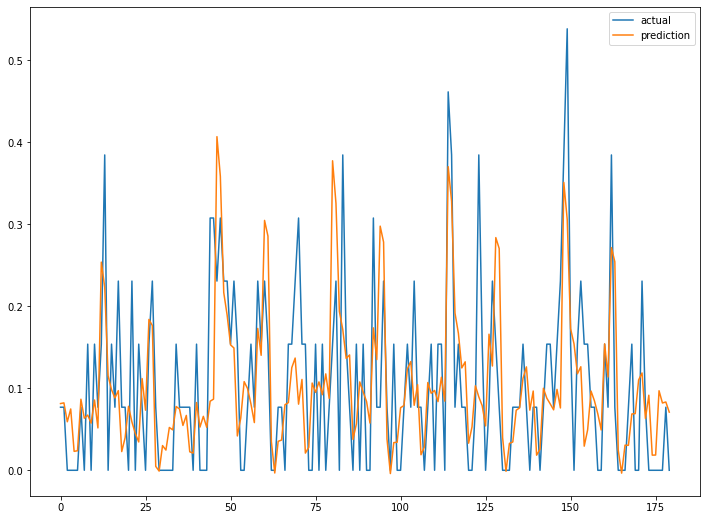

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                3392      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 3,409
Trainable params: 3,409
Non-trainable params: 0
_________________________________________________________________
